In [1]:
import math
import random
import yaml
import argparse
from dotmap import DotMap

import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.optim import Adam
from torch.nn.functional import cosine_similarity

import matplotlib.pyplot as plt
import wandb

In [2]:
import sys
sys.path.append("./src")  # make sure Python can find src/
from model_linear import GPTLinear#, GPTSoftmax
from model_softmax import GPTSoftmax
from data import MovingWindowSum
from train_step import train_step

In [3]:
# Config

device = "cuda" if torch.cuda.is_available() else "cpu"

config = {
'model':
  {
    'n_layer': 1,
    'n_head': 1,
    'n_embd': 256,
    'linear': True,
  },

'data':
  {
    'name': 'window',
    'min_num': 1,
    'max_num': 16,
    'k': 2,
    'p': 17,
    'sep': 17,
    'cot': False,
    'num_tokens': 16,
    'n_train': 256,
    'n_test': 64,
    'fixed_len': True,
  },

'train':
  {
    'lr': 0.0001,
    'grad_clip': -1,
    'num_steps': 500,
    'norm_type': "none_rank",
    'wandb': True,
    'save_ckpt': False,
    'ckpt_freq': 20,
  }
}

### MWS with LinearGPT Test

In [ ]:
config = DotMap(config)

config.model.vocab_size = max(config.data.p, config.data.max_num) + 1
config.model.block_size = 2 * config.data.num_tokens + 1

data_sampler = MovingWindowSum(
    min_num=config.data.min_num,
    max_num=config.data.max_num,
    k=config.data.k,
    p=config.data.p,
)

model = GPTLinear(config.model, return_att=True).to(device)
optim = Adam(model.parameters(), lr=config.train.lr)

if config.train.wandb:
    wandb_run_name = 'mws_linear_check'
    wandb.login(key="")
    wandb.init(project="loss_plateau_tf", name=wandb_run_name, config=config)
    wandb.watch(model)

for step in range(config.train.num_steps):
    train_step(
        model=model,
        optim=optim,
        data_sampler=data_sampler,
        step=step,
        config=config,
        device=device
    )
    
if config.train.wandb:
    wandb.finish()

In [ ]:
wandb.finish()

### MWS with Softmax Check

In [4]:
config = DotMap(config)

config.model.vocab_size = max(config.data.p, config.data.max_num) + 1
config.model.block_size = 2 * config.data.num_tokens + 1
config.train.num_steps = 2000
config.train.lr = 0.0001

data_sampler = MovingWindowSum(
    min_num=config.data.min_num,
    max_num=config.data.max_num,
    k=config.data.k,
    p=config.data.p,
)

model = GPTSoftmax(config.model, return_att=True, mask_input_loss=True).to(device)
optim = Adam(model.parameters(), lr=config.train.lr)

if config.train.wandb:
    wandb_run_name = 'mws_softmax_check_lossMasked_lr0.0001_2ksteps'
    wandb.login(key="")
    wandb.init(project="loss_plateau_tf", name=wandb_run_name, config=config)
    wandb.watch(model)

for step in range(config.train.num_steps):
    train_step(
        model=model,
        optim=optim,
        data_sampler=data_sampler,
        step=step,
        config=config,
        device=device
    )
    
if config.train.wandb:
    wandb.finish()

/home/jyue/.conda/envs/emerge/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jetyue04 (wth_ucsd). Use `wandb login --relogin` to force relogin


Step 0 -- Train loss: 2.8892598152160645, Train Acc: 0.059814453125 Test Acc: 0.0673828125
Step 1 -- Train loss: 2.867044687271118, Train Acc: 0.0634765625 Test Acc: 0.0537109375
Step 2 -- Train loss: 2.8564047813415527, Train Acc: 0.06884765625 Test Acc: 0.0654296875
Step 3 -- Train loss: 2.8511760234832764, Train Acc: 0.067138671875 Test Acc: 0.068359375
Step 4 -- Train loss: 2.847028970718384, Train Acc: 0.06005859375 Test Acc: 0.06640625
Step 5 -- Train loss: 2.8430466651916504, Train Acc: 0.052490234375 Test Acc: 0.0595703125
Step 6 -- Train loss: 2.841156244277954, Train Acc: 0.061279296875 Test Acc: 0.068359375
Step 7 -- Train loss: 2.8405096530914307, Train Acc: 0.064208984375 Test Acc: 0.0615234375
Step 8 -- Train loss: 2.8390278816223145, Train Acc: 0.05810546875 Test Acc: 0.0595703125
Step 9 -- Train loss: 2.8387396335601807, Train Acc: 0.053466796875 Test Acc: 0.060546875
Step 10 -- Train loss: 2.837505340576172, Train Acc: 0.0576171875 Test Acc: 0.0712890625
Step 11 -- Tra

: 

Step 0 -- Train loss: 2.8812289237976074, Train Acc: 0.054931640625 Test Acc: 0.0576171875
Step 1 -- Train loss: 2.854872941970825, Train Acc: 0.060546875 Test Acc: 0.0595703125
Step 2 -- Train loss: 2.8417277336120605, Train Acc: 0.058349609375 Test Acc: 0.0556640625
Step 3 -- Train loss: 2.8200223445892334, Train Acc: 0.060546875 Test Acc: 0.056640625
Step 4 -- Train loss: 2.8007192611694336, Train Acc: 0.063720703125 Test Acc: 0.06640625
Step 5 -- Train loss: 2.7870676517486572, Train Acc: 0.060546875 Test Acc: 0.0654296875
Step 6 -- Train loss: 2.777055501937866, Train Acc: 0.059814453125 Test Acc: 0.0595703125
Step 7 -- Train loss: 2.764025926589966, Train Acc: 0.060791015625 Test Acc: 0.05859375
Step 8 -- Train loss: 2.757514238357544, Train Acc: 0.052001953125 Test Acc: 0.0556640625
Step 9 -- Train loss: 2.751939296722412, Train Acc: 0.0595703125 Test Acc: 0.052734375
Step 10 -- Train loss: 2.744859457015991, Train Acc: 0.057861328125 Test Acc: 0.0712890625
Step 11 -- Train loss

KeyboardInterrupt: 

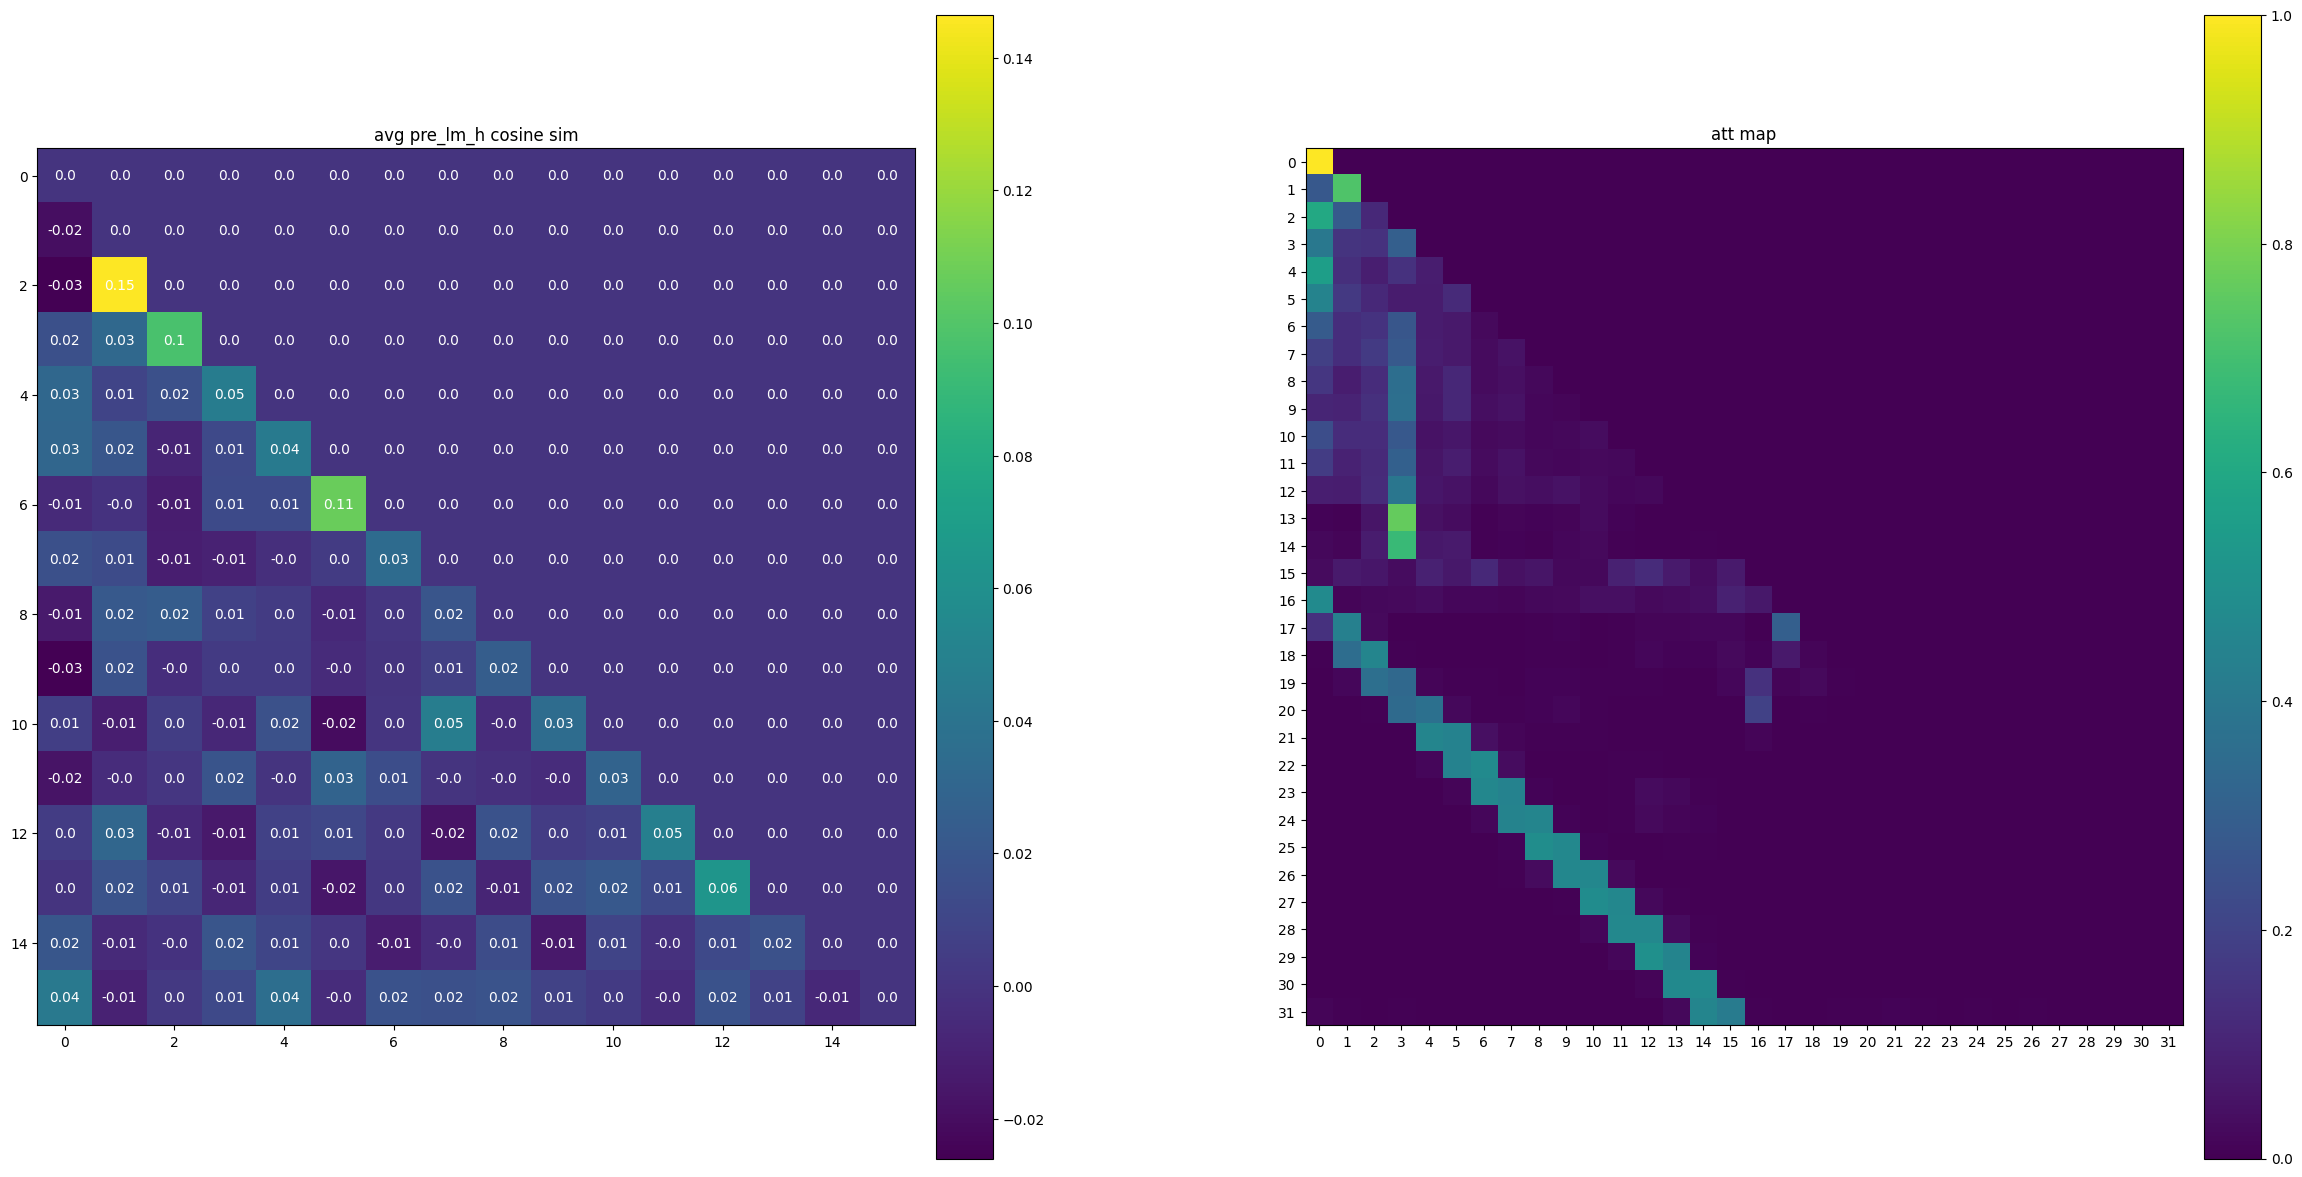

In [5]:
config = DotMap(config)

config.model.vocab_size = max(config.data.p, config.data.max_num) + 1
config.model.block_size = 2 * config.data.num_tokens + 1
config.train.num_steps = 2000
config.train.lr = 0.0001

data_sampler = MovingWindowSum(
    min_num=config.data.min_num,
    max_num=config.data.max_num,
    k=config.data.k,
    p=config.data.p,
)

model = GPTSoftmax(config.model, return_att=True, mask_input_loss=False).to(device)
optim = Adam(model.parameters(), lr=config.train.lr)

if config.train.wandb:
    wandb_run_name = 'mws_softmax_check_loss_not_masked_lr0.0001_2ksteps'
    wandb.login(key="")
    wandb.init(project="loss_plateau_tf", name=wandb_run_name, config=config)
    wandb.watch(model)

for step in range(config.train.num_steps):
    train_step(
        model=model,
        optim=optim,
        data_sampler=data_sampler,
        step=step,
        config=config,
        device=device
    )
    
if config.train.wandb:
    wandb.finish()